# <i>Fusarium oxysporum</i> Inulinase Visualisation With Biopython

## [**Biopython Tutorial and Cookbook**](http://biopython.org/DIST/docs/tutorial/Tutorial.html)

# Table of contents:<br>
1. [Attributes of Biopython](#1.-Attributes-of-Biopython)
2. [Understand FASTA file format](#2.-Understanding-FASTA-file-format)
3. [Sequence manipulation using Biopython](#3.-Sequence-manipulation-using-Biopython)
4. [Transcription & Translation](#4.-Transcription-&-Translation)
5. [Perform Basic Local Alignment using NCBI-BLAST](#5.-Basic-Local-Alignment-Using-NCBI-BLAST)
6. [Reading PDB file](#6.-Reading-PDB-file)
7. [<i>Fusarium oxysporum</i> Inulunase Protein structure](#7.-<i>Fusarium-oxysporum</i>-Inulunase-Protein-structure)

## Modules

In [1]:
import Bio
import pylab
import urllib
import pandas as pd
import nglview as nv
import numpy as np
import warnings
import matplotlib.pyplot as plt
from Bio.Seq import Seq
from Bio.Blast import NCBIWWW
from collections import Counter
from Bio.Data import CodonTable
from Bio import SeqIO, SearchIO
from Bio.PDB import PDBParser,MMCIFParser
from Bio.SeqUtils import GC, molecular_weight

## 1. Attributes of Biopython

In [2]:
# Check Attributes of Biopython
dir(Bio)

['Align',
 'BiopythonDeprecationWarning',
 'BiopythonExperimentalWarning',
 'BiopythonParserWarning',
 'BiopythonWarning',
 'Blast',
 'Data',
 'File',
 'GenBank',
 'MissingExternalDependencyError',
 'MissingPythonDependencyError',
 'PDB',
 'SVDSuperimposer',
 'SearchIO',
 'Seq',
 'SeqFeature',
 'SeqIO',
 'SeqRecord',
 'SeqUtils',
 'Sequencing',
 'StreamModeError',
 'SwissProt',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_parent_dir',
 'os',
 'warnings']

## 2. Understanding FASTA file format

### GENETIC MATERIAL

<div class="alert alert-block alert-info" style="Font-size:16px">

**DNA** includes **A T G C**<br>
**RNA** includes **U** instead of **T**<br>
    
</div>

### 2.1. FASTA Format

### FASTA File

    
**Description_of_DNA_sequence**
<br>
ATGCTGCGAGACAGACAGACATACTATCATCTCAGACGCAG<br>
ATGCTGCGAGACAGACAGACATACTATCATCTCAGACGCAG<br>


### 2.2. Reading from file

In [3]:
inulinase = SeqIO.read("gene.fna", "fasta")
inulinase

SeqRecord(seq=Seq('ATGATTACATATCTCAGTCACAAGGCCTGGTTCATGCCTTATCCTACGAAGTTC...TGA'), id='NW_017264853.1:16178-17746', name='NW_017264853.1:16178-17746', description='NW_017264853.1:16178-17746 FOXG_17513 [organism=Fusarium oxysporum f. sp. lycopersici 4287] [GeneID=28958268] [chromosome=Unknown]', dbxrefs=[])

In [4]:
type(inulinase)

Bio.SeqRecord.SeqRecord

### 2.3 Sequence details

In [5]:
# list sequence details
inulinase.id

'NW_017264853.1:16178-17746'

In [6]:
seqfromfile = inulinase.seq

In [7]:
# list sequence details
for record in SeqIO.parse("gene.fna", "fasta"):
    print(record)

ID: NW_017264853.1:16178-17746
Name: NW_017264853.1:16178-17746
Description: NW_017264853.1:16178-17746 FOXG_17513 [organism=Fusarium oxysporum f. sp. lycopersici 4287] [GeneID=28958268] [chromosome=Unknown]
Number of features: 0
Seq('ATGATTACATATCTCAGTCACAAGGCCTGGTTCATGCCTTATCCTACGAAGTTC...TGA')


In [8]:
# store sequence for later analysis
seqfromfile = record.seq
print(seqfromfile)

ATGATTACATATCTCAGTCACAAGGCCTGGTTCATGCCTTATCCTACGAAGTTCGTGGGCCTTGCTTTAATCTCTCTTCTCACTTGCCTCACCCAAGCTGACGACTTTCGTCCTCTTTATCACTTCGTCCCAGAACAAAACTGGATGAATGAACCCAATGGCCTCATCAAGATCGGTTCCCAATGGCACCTCTTCTTCCAGCACAATCCCACCGGAAACTTTTGGGGTAACCTGAGCTGGGGCCATGCGACCAGTACTGACTTGATTGACTGGAACCATCTCCCTGTCGCAATCTCGAGTGCCAATGGGGTTCAAGCCTTCACAGGGACCTCGTACTTTGATGAGGCTAATAGATCTGGTCTTGGAACATCTGAAAACCCACCGTACCTTGCCTTTTATACTGGGTACTTTCCAGACACCGGAGTACAGGATCAGAGACTTGCTTATAGCCTAGACCAAGGGGAGACTTGGATCAAGTACAGCGAAAACCCGATCATCTCGCAGGCACAGGAGAAACCGCACGACATTACCGGTGGCTTAGAGACGCGAGACCCCAAGGTCTTCTTTGACGCTGCAACAAAAACTTGGGTCATGGTCCTCGCCCATGGAGGACAAAACAAATTGTCATTCTGGACATCTCCTGACGCCAAGACTTGGACCTGGCATAACGATCTCACCGATGACGGTATTCCCGGACTTCCCAGTGGTATCACAGGCTGGGAAGTGCCTGATCTCTTTAATCTACCCGTCGAGGGTTCTTCAGACACTAAATGGGTCCTGATAGTTACTCCTGCCCAGGGGTCTCCCGCGGGTGGCAATGGCGTTTTTGCAGTCACTGGCTCGTTTGACGGCGCCACCTTCACCCCCGACCCTGTTGATCCAACCAACATGTGGCTAGATTTTGGGCGTGATTGGGATGGCGCTTATAGCTGGGAAAATGTGCCCACGTCCGATGGCCGTAAGATCCTTGCTTCGGTCATGAACAGCTATGGAGTCGACC

In [9]:
# length of sequence
len(seqfromfile)

1569

In [10]:
#molecular weight
molecular_weight(seqfromfile)

483605.91380000464

## 3. Sequence manipulation using Biopython

### 3.1. Indexing / Slicing

In [11]:
# CODON
seqfromfile[0:4]

Seq('ATGA')

In [12]:
seqfromfile[0:3]+seqfromfile[-3:]

Seq('ATGTGA')

### 3.2. Concatination

In [13]:
concat = seqfromfile[0:6]+seqfromfile[-5:]
concat

Seq('ATGATTCATGA')

### 3.3. Codon Search

In [14]:
seqfromfile.find('AGA')

131

### 3.4. GC Content

- In molecular biology and genetics, GC-content is the percentage of nitrogenous bases in a DNA or RNA molecule that are either guanine or cytosine.

In [15]:
# the logic of GC content
(seqfromfile.count('G')+seqfromfile.count('C'))/len(seqfromfile)*100

51.625239005736134

In [16]:
# determineation of GC content using Biopython
GC(seqfromfile)

51.62523900573614

### 3.5. Complement

- The four bases in DNA are adenine (A), cytosine (C), guanine (G), and thymine (T). 
- These bases form specific pairs (A with T, and G with C). 
- Base pair may also refer to the actual number of base pairs, such as 8 base pairs, in a sequence of nucleotides.

In [17]:
seqfromfile[:11]

Seq('ATGATTACATA')

In [18]:
#complement
seqfromfile[:11].complement()

Seq('TACTAATGTAT')

In [19]:
#reverse complement
seqfromfile[:11].reverse_complement()

Seq('TATGTAATCAT')

In [20]:
seqfromfile[-10:].reverse_complement()

Seq('TCATGCGACA')

## 4. Transcription & Translation

- <b>In transcription</b>, the strand of DNA that is used to synthesize mRNA is known as the template strand. 
- Whereas, the non-template or coding strand matches the sequence of the RNA. 
- However, it doesn’t match it exactly as RNA has uracil instead of thymine.
- The nucleotides of RNA are known as ribonucleotides. 
- These nucleotides bond to the template strand via hydrogen bonds after the DNA molecule opens up. 
- Those nucleotides are bonded together with a phosphodiester bond just like DNA is bonded.


- While transcription is the process of creating mRNA from DNA, <b>translation</b> is the process of converting the genetic information of mRNA into proteins.

<a align='center'>
    <img src='https://images.squarespace-cdn.com/content/v1/52668d02e4b0f593739ec2b6/1533131113081-4Q921GDMF0MW07F1P9OS/Slide01.png?format=750w' width='600'>
</a>
<a align='center'>
    <img src='https://www.nature.com/scitable/content/ne0000/ne0000/ne0000/ne0000/105292500/44376_38a.jpg' width='600'>
</a>


### 4.1. Transcription

In [21]:
#Transcribe
mRNA = seqfromfile.transcribe()
mRNA[:10]

Seq('AUGAUUACAU')

In [22]:
#Back transcribe
mRNA[:10].back_transcribe()

Seq('ATGATTACAT')

### 4.2. Translation

In [23]:
print(CodonTable.unambiguous_dna_by_id[1])

Table 1 Standard, SGC0

  |  T      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
T | TTT F   | TCT S   | TAT Y   | TGT C   | T
T | TTC F   | TCC S   | TAC Y   | TGC C   | C
T | TTA L   | TCA S   | TAA Stop| TGA Stop| A
T | TTG L(s)| TCG S   | TAG Stop| TGG W   | G
--+---------+---------+---------+---------+--
C | CTT L   | CCT P   | CAT H   | CGT R   | T
C | CTC L   | CCC P   | CAC H   | CGC R   | C
C | CTA L   | CCA P   | CAA Q   | CGA R   | A
C | CTG L(s)| CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | ATT I   | ACT T   | AAT N   | AGT S   | T
A | ATC I   | ACC T   | AAC N   | AGC S   | C
A | ATA I   | ACA T   | AAA K   | AGA R   | A
A | ATG M(s)| ACG T   | AAG K   | AGG R   | G
--+---------+---------+---------+---------+--
G | GTT V   | GCT A   | GAT D   | GGT G   | T
G | GTC V   | GCC A   | GAC D   | GGC G   | C
G | GTA V   | GCA A   | GAA E   | GGA G   | A
G | GTG V   | GCG A   | GAG E   | GGG G   | G
--+---------

In [24]:
protein_seq = seqfromfile.translate()
protein_seq[:10]

Seq('MITYLSHKAW')

In [25]:
len(protein_seq)

523

In [26]:
len(seqfromfile)

1569

In [27]:
len(seqfromfile)/len(protein_seq)

3.0

In [28]:
protein_seq.back_transcribe()

Seq('MITYLSHKAWFMPYPTKFVGLALISLLTCLTQADDFRPLYHFVPEQNWMNEPNG...VA*')

In [29]:
print(CodonTable.unambiguous_dna_by_id[1])

Table 1 Standard, SGC0

  |  T      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
T | TTT F   | TCT S   | TAT Y   | TGT C   | T
T | TTC F   | TCC S   | TAC Y   | TGC C   | C
T | TTA L   | TCA S   | TAA Stop| TGA Stop| A
T | TTG L(s)| TCG S   | TAG Stop| TGG W   | G
--+---------+---------+---------+---------+--
C | CTT L   | CCT P   | CAT H   | CGT R   | T
C | CTC L   | CCC P   | CAC H   | CGC R   | C
C | CTA L   | CCA P   | CAA Q   | CGA R   | A
C | CTG L(s)| CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | ATT I   | ACT T   | AAT N   | AGT S   | T
A | ATC I   | ACC T   | AAC N   | AGC S   | C
A | ATA I   | ACA T   | AAA K   | AGA R   | A
A | ATG M(s)| ACG T   | AAG K   | AGG R   | G
--+---------+---------+---------+---------+--
G | GTT V   | GCT A   | GAT D   | GGT G   | T
G | GTC V   | GCC A   | GAC D   | GGC G   | C
G | GTA V   | GCA A   | GAA E   | GGA G   | A
G | GTG V   | GCG A   | GAG E   | GGG G   | G
--+---------

In [30]:
# Listing the most common amino acids
common_amino = Counter(protein_seq)
common_amino.most_common(10)

[('G', 50),
 ('S', 48),
 ('L', 45),
 ('T', 43),
 ('V', 35),
 ('A', 34),
 ('P', 32),
 ('D', 32),
 ('N', 28),
 ('I', 27)]

Text(0, 0.5, 'Frequency')

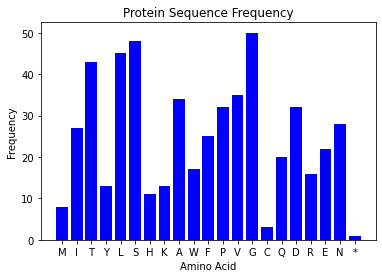

In [31]:
# visualize all 20 amino acid occurrences in the form of a histogram
pylab.bar(common_amino.keys(), common_amino.values(), color='blue')

pylab.title('Protein Sequence Frequency')
pylab.xlabel('Amino Acid')
pylab.ylabel('Frequency')

 - Note: Because stop codon * signifies end of a protein we can split the sequence using (*)

In [32]:
protein_list = [str(i) for i in protein_seq.split('*')]
protein_list[:10]

['MITYLSHKAWFMPYPTKFVGLALISLLTCLTQADDFRPLYHFVPEQNWMNEPNGLIKIGSQWHLFFQHNPTGNFWGNLSWGHATSTDLIDWNHLPVAISSANGVQAFTGTSYFDEANRSGLGTSENPPYLAFYTGYFPDTGVQDQRLAYSLDQGETWIKYSENPIISQAQEKPHDITGGLETRDPKVFFDAATKTWVMVLAHGGQNKLSFWTSPDAKTWTWHNDLTDDGIPGLPSGITGWEVPDLFNLPVEGSSDTKWVLIVTPAQGSPAGGNGVFAVTGSFDGATFTPDPVDPTNMWLDFGRDWDGAYSWENVPTSDGRKILASVMNSYGVDPPTNAWKGMLSFPRTLQLREIGGELRFIQQPVIELESVGTSLGNIANQTLEPGTTLLSDCRGTALDISISFVPTEGSILSLAVRKGDSEQTVIQYAQSNGALTVDRRASGNISYNSAAGGIHTATFSPDSNNVAHLRVLVDMCSVEVFGGAGEVVISDLIFPSESSNRLSLSTTGGNVVLQSVEIRSVA',
 '']

In [33]:
# convert sequences to dataframe
large_proteins = [x for x in protein_list if len(x)>2]
df = pd.DataFrame({'protein_seq':large_proteins})

# Add a column with sequence lengths
df['length'] = df['protein_seq'].apply(len)
df.head()

,protein_seq,length
0,MITYLSHKAWFMPYPTKFVGLALISLLTCLTQADDFRPLYHFVPEQ...,522


In [34]:
# sort sequence data
df.sort_values(by = ['length'], ascending=False)[:10]

,protein_seq,length
0,MITYLSHKAWFMPYPTKFVGLALISLLTCLTQADDFRPLYHFVPEQ...,522


In [35]:
# let's take a single protein from the table
one_large_protein = df.nlargest(1, 'length')
gene_inulinase = one_large_protein.iloc[0,0]
gene_inulinase

'MITYLSHKAWFMPYPTKFVGLALISLLTCLTQADDFRPLYHFVPEQNWMNEPNGLIKIGSQWHLFFQHNPTGNFWGNLSWGHATSTDLIDWNHLPVAISSANGVQAFTGTSYFDEANRSGLGTSENPPYLAFYTGYFPDTGVQDQRLAYSLDQGETWIKYSENPIISQAQEKPHDITGGLETRDPKVFFDAATKTWVMVLAHGGQNKLSFWTSPDAKTWTWHNDLTDDGIPGLPSGITGWEVPDLFNLPVEGSSDTKWVLIVTPAQGSPAGGNGVFAVTGSFDGATFTPDPVDPTNMWLDFGRDWDGAYSWENVPTSDGRKILASVMNSYGVDPPTNAWKGMLSFPRTLQLREIGGELRFIQQPVIELESVGTSLGNIANQTLEPGTTLLSDCRGTALDISISFVPTEGSILSLAVRKGDSEQTVIQYAQSNGALTVDRRASGNISYNSAAGGIHTATFSPDSNNVAHLRVLVDMCSVEVFGGAGEVVISDLIFPSESSNRLSLSTTGGNVVLQSVEIRSVA'

In [36]:
# write to a file
with open('gene_inulinase.fasta', 'w') as file:
    file.write('>large protein\n'+gene_inulinase)

## 5. Basic Local Alignment Using NCBI-BLAST

In [37]:
# Read single_seq.fasta
read = SeqIO.read('gene_inulinase.fasta','fasta')
read.seq

Seq('MITYLSHKAWFMPYPTKFVGLALISLLTCLTQADDFRPLYHFVPEQNWMNEPNG...SVA')

In [38]:
%%time

# based on the server load this query might take 2-3 minutes to run
result_handle = NCBIWWW.qblast('blastp','pdb',read.seq)
blast_qresult = SearchIO.read(result_handle,'blast-xml')

Wall time: 1min 4s


In [39]:
print(blast_qresult[:5])

Program: blastp (2.13.0+)
  Query: unnamed (522)
         protein product
 Target: pdb
   Hits: ----  -----  ----------------------------------------------------------
            #  # HSP  ID + description
         ----  -----  ----------------------------------------------------------
            0      1  pdb|3RWK|X  First crystal structure of an endo-inulinas...
            1      1  pdb|1Y4W|A  Crystal structure of exo-inulinase from Asp...
            2      1  pdb|3U14|A  Chain A, Fructofuranosidase [Schwanniomyces...
            3      1  pdb|3KF3|A  Chain A, Invertase [Schwanniomyces occident...
            4      1  pdb|3KF5|A  Chain A, Invertase [Schwanniomyces occident...


In [40]:
#fetch the id, description, evalue, bitscore & alignment of first hit

seqid = blast_qresult[0]

details = seqid[0]

print(f"\
Sequence ID:{seqid.id}\n\
description:{seqid.description}\n\
E value:    {details.evalue} \n\
Bit Score:  {details.bitscore}\n\
")

Sequence ID:pdb|3RWK|X
description:First crystal structure of an endo-inulinase, from Aspergillus ficuum: structural analysis and comparison with other GH32 enzymes. [Aspergillus ficuum]
E value:    0.0 
Bit Score:  696.812



In [41]:
print(f"alignment:\n{details.aln}")

alignment:
Alignment with 2 rows and 509 columns
LALISLLTCL-------TQADDFRPLYHFVPEQNWMNEPNGLIK...SVA unnamed
VAYMVWMTCLGLTLPSQAQSNDYRPSYHFTPDQYWMNEPNGLIK...SVS pdb|3RWK|X


## 6. Reading PDB file

### Retreiving PDB Structure From RCSB PDB

In [42]:
seqid.id

'pdb|3RWK|X'

In [43]:
# split seqid
seqid.id.split('|')[1]

'3RWK'

In [44]:
# link format https://files.rcsb.org/download/3RWK.pdb
urllib.request.urlretrieve('https://files.rcsb.org/download/3RWK.pdb','C:/Users/test/Desktop/PROGRAMMING_WEB DEVELOPMENT/IBM_DATA_SCIENCE_PYTHON/11. BIO_PYTHON/3RWK_inulinase.pdb' )

('C:/Users/test/Desktop/PROGRAMMING_WEB DEVELOPMENT/IBM_DATA_SCIENCE_PYTHON/11. BIO_PYTHON/3RWK_inulinase.pdb',
 <http.client.HTTPMessage at 0x20d04862550>)

### 6.1 Reading PDB file

In [45]:
parser = PDBParser()
structure = parser.get_structure('3RWK', '3RWK_inulinase.pdb')
structure

C:\Users\test\anaconda3\lib\site-packages\Bio\PDB\StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain X is discontinuous at line 4361.
  warnings.warn(


<Structure id=3RWK>

### 6.2 Identifying the number of chains

In [46]:
for chain in structure[0]:
    print(f'chain ID: {chain.id}')

chain ID: X
chain ID: A
chain ID: B


## 7. <i>Fusarium oxysporum</i> Inulinase Protein structure

### 7.1. nglview

In [47]:
nv.demo()

NGLWidget()

In [48]:
view = nv.show_biopython(structure)
view

NGLWidget()

In [49]:
view.render_image()

Image(value=b'', width='99%')

### 7.2. nglview GUI

In [50]:
#GUI
nv.show_biopython(structure, gui=True)

NGLWidget()

## Conclusions<br>
<div style="Font-size:16px">
- The inulinase sequence of <i>Fusarium oxysporum</i> has 1569 base pairs<br>
- The GC content of the sequence is 51.63<br>
- Largest protein BLAST results corresponds to <b>inulinase</b>3RWK <br>
- Protein 3RWK has 3 chains inclusing, X, A, and B<br>
</div>